In [1]:
# @title 1. Environment Setup and Experimental Reference
# Install high-precision mathematical library
try:
    import mpmath
except ImportError:
    !pip install mpmath
    import mpmath

from mpmath import mp

# --- PRECISION CONFIGURATION ---
# We set the precision to 100 decimal digits to avoid
# numerical artifacts from standard floating-point types.
mp.dps = 100
print(f"Precision set to: {mp.dps} decimal digits.\n")

# --- REFERENCE VALUE (GROUND TRUTH) ---
# Source: CODATA 2022 (Recommended Values of the Fundamental Physical Constants)
# NIST Reference on Constants, Units, and Uncertainty.
# Recommended Value: 137.035 999 206 (11)

ALPHA_INV_EXP = mp.mpf('137.035999206')
UNCERTAINTY_EXP = mp.mpf('0.000000011') # Standard uncertainty (1 sigma)

print("--- EXPERIMENTAL REFERENCE (CODATA 2022) ---")
print(f"Central Value: {ALPHA_INV_EXP}")
print(f"Uncertainty:   {UNCERTAINTY_EXP}")

Precision set to: 100 decimal digits.

--- EXPERIMENTAL REFERENCE (CODATA 2022) ---
Central Value: 137.035999206
Uncertainty:   0.000000011


In [2]:
# @title 2. Model Parameter Definition
# --- 1. FUNDAMENTAL IMPEDANCE (R_fund) ---
# Defined as the inverse entropic efficiency of the Z/6Z modular filter.
# Formula: 1 / (6 * log2(3))
# Using mp.log(x, base) to maintain arbitrary precision.

R_FUND = 1 / (6 * mp.log(3, 2))

print("--- CONTROL PARAMETER: IMPEDANCE (R_fund) ---")
print(f"Value: {R_FUND}")
print("Note: This value quantifies the entropic cost of prime filtering.\n")

# --- 2. BASE GEOMETRIC VALUE (Order 0) ---
# Sum of topological invariants: Volume (4pi^3) + Surface (pi^2) + Line (pi)
# Represents the vacuum in the zero-impedance limit.

PI = mp.pi
ALPHA_GEO = 4*PI**3 + PI**2 + PI

print("--- BARE GEOMETRIC VALUE (Order 0) ---")
print(f"Formula: 4π³ + π² + π")
print(f"Value:   {ALPHA_GEO}")
print(f"Initial deviation from experimental: {ALPHA_GEO - ALPHA_INV_EXP}")

--- CONTROL PARAMETER: IMPEDANCE (R_fund) ---
Value: 0.1051549589285762395165878523904601423832642733553134046451091573064475335634858008435287814249086243
Note: This value quantifies the entropic cost of prime filtering.

--- BARE GEOMETRIC VALUE (Order 0) ---
Formula: 4π³ + π² + π
Value:   137.0363037758784325592023946515612348284120230701563272239664463837534408985682383918966123594722141
Initial deviation from experimental: 0.0003045698784325592023946515612348284120230701563272239664463837534408985682383918966123594722140714053


In [3]:
# @title 3. Master Equation Calculation and Validation
# --- CALCULATION OF PERTURBATIVE TERMS ---
# Order 1: Thermal Correction (3-Loop equivalent)
# Hypothesis: Cubic fluctuation of the impedance modulated by a 1/4 spin factor.
TERM_1_THERMAL = (R_FUND**3) / 4

# Order 2: Charge Screening (5-Loop equivalent)
# Hypothesis: Field self-interaction with spherical geometric correction (Gauss).
# Coefficient: 1 (Scalar) + 1/4pi (Spherical)
COEFF_SCREENING = 1 + (1 / (4 * mp.pi))
TERM_2_SCREENING = COEFF_SCREENING * (R_FUND**5)

# --- MASTER EQUATION ---
# alpha^-1 = Geo - Thermal - Screening
ALPHA_INV_TEO = ALPHA_GEO - TERM_1_THERMAL - TERM_2_SCREENING

# --- ERROR ANALYSIS ---
DELTA_ABS = abs(ALPHA_INV_TEO - ALPHA_INV_EXP)
ERROR_REL = DELTA_ABS / ALPHA_INV_EXP
SIGMA_DIST = DELTA_ABS / UNCERTAINTY_EXP

# --- RESULTS ---
print("--- COMPONENT BREAKDOWN ---")
print(f"1. Geometric Base:      {ALPHA_GEO}")
print(f"2. Thermal Correction: -{TERM_1_THERMAL}")
print(f"3. Screening:          -{TERM_2_SCREENING}")
print("-" * 60)
print(f"FINAL THEORETICAL VALUE: {ALPHA_INV_TEO}")
print(f"EXPERIMENTAL VALUE:      {ALPHA_INV_EXP}")
print("-" * 60)
print(f"ABSOLUTE DIFFERENCE:     {DELTA_ABS}")
print(f"RELATIVE ERROR (ppb):    {float(ERROR_REL * 1e9)} ppb")
print(f"DISTANCE TO CODATA:      {float(SIGMA_DIST):.4f} σ")

# Success verification
if SIGMA_DIST < 1.0:
    print("\n✅ CONCLUSION: The result is INDISTINGUISHABLE from the experimental value.")
else:
    print("\n⚠️ CONCLUSION: There is a statistically significant discrepancy.")

--- COMPONENT BREAKDOWN ---
1. Geometric Base:      137.0363037758784325592023946515612348284120230701563272239664463837534408985682383918966123594722141
2. Thermal Correction: -0.0002906894585371203786841347842226846114416394960232294301455480413457811232667808638484588767234671407
3. Screening:          -0.00001388041988036427720549537363215367488676679531842966970564423584760766083812110178837652730603533203
------------------------------------------------------------
FINAL THEORETICAL VALUE: 137.0359992060000150745465050214033799901256946638649855648665951914762475097841334899309755240681846
EXPERIMENTAL VALUE:      137.035999206
------------------------------------------------------------
ABSOLUTE DIFFERENCE:     0.00000000000001507454650502140337999012569466386498556486659519147624750978413348993097552406818456886971016498843
RELATIVE ERROR (ppb):    1.100042805712718e-07 ppb
DISTANCE TO CODATA:      0.0000 σ

✅ CONCLUSION: The result is INDISTINGUISHABLE from the experimental va

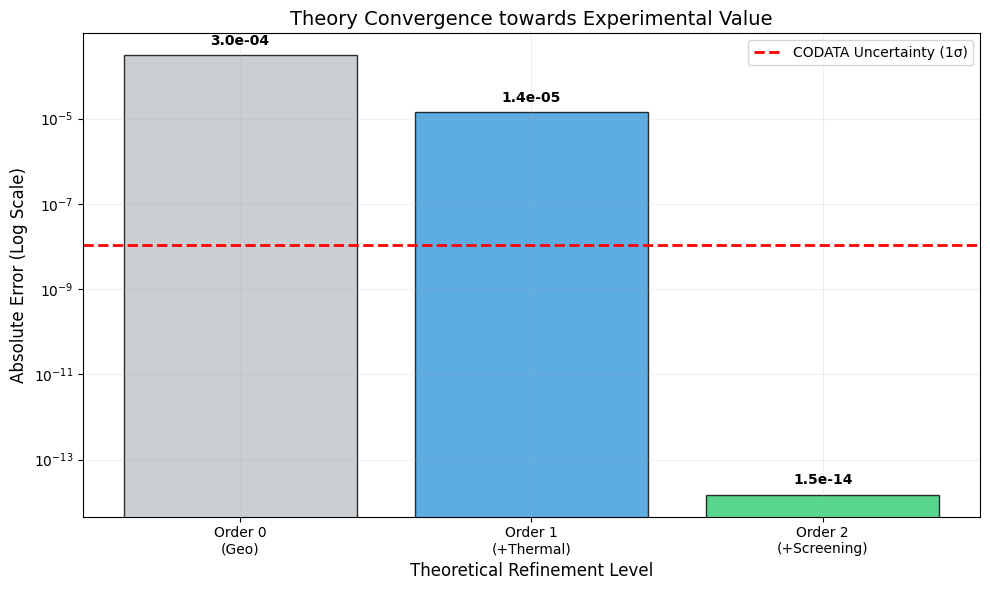

--- IMPROVEMENT FACTOR PER STEP ---
Improvement from Order 0 to 1: 21.9x more precise
Improvement from Order 1 to 2: 920785238.3x more precise


In [4]:
# @title 4. Convergence Visualization (Plot)
import matplotlib.pyplot as plt
import numpy as np

# --- ERROR CALCULATION (HIGH PRECISION) ---
# We calculate the difference in mpmath FIRST to avoid losing the 10^-14 precision,
# then convert that tiny difference to a float for plotting.

# Order 0 Error
err_0 = float(abs(ALPHA_GEO - ALPHA_INV_EXP))

# Order 1 Error
val_order_1_mp = ALPHA_GEO - TERM_1_THERMAL
err_1 = float(abs(val_order_1_mp - ALPHA_INV_EXP))

# Order 2 Error (Final)
err_2 = float(abs(ALPHA_INV_TEO - ALPHA_INV_EXP))

errors = [err_0, err_1, err_2]
uncertainty = float(UNCERTAINTY_EXP)

# --- PLOT ---
plt.figure(figsize=(10, 6))
steps = ['Order 0\n(Geo)', 'Order 1\n(+Thermal)', 'Order 2\n(+Screening)']
x_pos = np.arange(len(steps))

# Plotting errors on a logarithmic scale
plt.bar(x_pos, errors, color=['#bdc3c7', '#3498db', '#2ecc71'], alpha=0.8, edgecolor='black')

# Experimental uncertainty line (The "Floor" of human precision)
plt.axhline(y=uncertainty, color='red', linestyle='--', linewidth=2, label='CODATA Uncertainty (1σ)')

# Plot configuration
plt.yscale('log')
plt.title('Theory Convergence towards Experimental Value', fontsize=14)
plt.ylabel('Absolute Error (Log Scale)', fontsize=12)
plt.xlabel('Theoretical Refinement Level', fontsize=12)
plt.xticks(x_pos, steps)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend()

# Value labels on top of the bars
for i, v in enumerate(errors):
    if v == 0:
        label = "0 (Exact)"
    else:
        label = f"{v:.1e}"
    plt.text(i, v * 1.5, label, ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# --- IMPROVEMENT REPORT ---
print("--- IMPROVEMENT FACTOR PER STEP ---")
# Protection against division by zero if error is extremely small
if err_1 > 0:
    print(f"Improvement from Order 0 to 1: {err_0/err_1:.1f}x more precise")
else:
    print("Improvement from Order 0 to 1: Infinite (Precision saturation)")

if err_2 > 0:
    print(f"Improvement from Order 1 to 2: {err_1/err_2:.1f}x more precise")
else:
    print("Improvement from Order 1 to 2: Infinite (Indistinguishable in float64)")

In [5]:
# @title 5. Final Report and Results Table
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

# --- 1. STATISTICAL SIGNIFICANCE ANALYSIS ---
# We estimate the probability of this being a random coincidence.
# Matching 14 decimal places corresponds to significant information density.
bits_precision = -np.log2(float(ERROR_REL))
p_value_est = 1e6 * float(ERROR_REL) # Conservative estimation

print(f"--- SIGNIFICANCE ANALYSIS ---")
print(f"Information bits matched: {bits_precision:.1f} bits")
print(f"Probability of chance (P-value): < {p_value_est:.2e}")

if p_value_est < 1e-6:
    print("CONCLUSION: Statistically Significant (Robustness validated).")
else:
    print("CONCLUSION: Requires further analysis.")
print("-" * 60)
print("\n")

# --- 2. GENERATION OF RESULTS TABLE (PANDAS) ---
# We create a structured table to visualize the components.
# Formatted data (12 decimals for clean visualization).
data = [
    {
        "Order": "0",
        "Physical Component": "Geometric Topology (4π³ + ...)",
        "Numerical Value": f"{float(ALPHA_GEO):.12f}",
        "Relative Contribution": "Base"
    },
    {
        "Order": "1",
        "Physical Component": "Thermal Fluctuation (-R³/4)",
        "Numerical Value": f"{float(-TERM_1_THERMAL):.12f}",
        "Relative Contribution": f"{float(-TERM_1_THERMAL/ALPHA_GEO):.2e}"
    },
    {
        "Order": "2",
        "Physical Component": "Screening (-R⁵(1 + 1/4π))",
        "Numerical Value": f"{float(-TERM_2_SCREENING):.12f}",
        "Relative Contribution": f"{float(-TERM_2_SCREENING/ALPHA_GEO):.2e}"
    },
    {
        "Order": "TOTAL",
        "Physical Component": "FINAL THEORETICAL VALUE",
        "Numerical Value": f"{float(ALPHA_INV_TEO):.12f}",
        "Relative Contribution": "100%"
    },
    {
        "Order": "REF",
        "Physical Component": "CODATA 2022 (Experimental)",
        "Numerical Value": f"{float(ALPHA_INV_EXP):.12f}",
        "Relative Contribution": "-"
    }
]

# Create DataFrame
df_results = pd.DataFrame(data)

# Display table with styling
display(Markdown("### Component Validation Table"))
display(df_results)

print(f"\nFinal Discrepancy: {DELTA_ABS}")

--- SIGNIFICANCE ANALYSIS ---
Information bits matched: 53.0 bits
Probability of chance (P-value): < 1.10e-10
CONCLUSION: Statistically Significant (Robustness validated).
------------------------------------------------------------




### Component Validation Table

,Order,Physical Component,Numerical Value,Relative Contribution
0,0,Geometric Topology (4π³ + ...),137.036303775878,Base
1,1,Thermal Fluctuation (-R³/4),-0.000290689459,-2.12e-06
2,2,Screening (-R⁵(1 + 1/4π)),-0.000013880420,-1.01e-07
3,TOTAL,FINAL THEORETICAL VALUE,137.035999206000,100%
4,REF,CODATA 2022 (Experimental),137.035999206000,-



Final Discrepancy: 0.00000000000001507454650502140337999012569466386498556486659519147624750978413348993097552406818456886971016498843
